# Plasmid heterozygosis: single-cell microfluidics data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import pathlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display
import csv
import pandas as pd
from matplotlib import gridspec

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble']="\\usepackage{subdepth},\\usepackage{type1cm}"

print("> Python libraries imported")

> Python libraries imported


In [2]:
#sys.path.insert(0, '/Users/ESB/RPM_SYNC/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')

from AnalysisFunctions import *
from PlottingFunctions import *

> Analysis Functions loaded
Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [3]:
#workingDir='/home/charly/Lab/Projects/uJ/local/experiments/HT-LB/' #local
#workingDir='/home/esb/Projects/uJ/local/experiments/HT-LB/' #local
#os.chdir(workingDir)

In [4]:
pwd()

'/home/esb/Projects/uJ/local/experiments_ms/HT-Sine2hr'

In [30]:
expeLabel="HT-Sine-2hr"
list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32,xy33".split(",") 
#list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32".split(",") 




rootDir="../../data_sample/HT-Sine-2hr/"


#toFile=False
toFile=True

#Parameters 

frame2min=5

notcaptured_start=117
notcaptured_end=143

frame_experiment_start=1;
frame_signal_start=24-1
frame_signal_end=210
frame_experiment_end=210



frame_experiment_start=1;
frame_signal_start=24-1
frame_signal_end=116
frame_experiment_end=116

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
frames_list=[x for x in frames]
times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("\nFrame list:  %s"%(frames_list))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_signal_start=%s\t(%sh)"%(t_signal_start,t_signal_start/60))
print("t_signal_end=%s\t(%sh)"%(t_signal_end, t_signal_end/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))


#Prepare file system
dataPath="%sdata/DsRed+GFP/"%rootDir

figurePath="%sfigures/"%rootDir
if not os.path.exists(figurePath) and toFile:
    os.mkdir(figurePath)

normDataPath="%sdata/normData/"%rootDir
if not os.path.exists(normDataPath) and toFile:
    os.mkdir(normDataPath)

# normDataNPath="%sdata/normDataN/"%rootDir
# if not os.path.exists(normDataNPath) and toFile:
#     os.mkdir(normDataNPath)

    
# relIntensityPath="%sdata/relativeIntensity/"%rootDir
# if not os.path.exists(relIntensityPath) and toFile:
#     os.mkdir(relIntensityPath)

    
print("\n> Parameters loaded")


Frames:  range(1, 117)	 0.0->9.583333333333334 hours

Frame list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
t_experiment_start=0	(0.0h)
t_signal_start=110	(1.8333333333333333h)
t_signal_end=575	(9.583333333333334h)
t_experiment_end=575	(9.583333333333334h)

> Parameters loaded


In [31]:

data_pos=[]
data_frame=[]
data_GFP=[]
data_DsRed=[]
data_phi=[]
data_rho=[]

pop_df_list=[]
loaded_frames=0;
for root, dirs, files in os.walk(dataPath):
    dirs.sort()
    files.sort()
    #print("*",path)
    path = root.split(os.sep)
    if(not path[-1] in list_pos):
        continue
    print(path)
    trap_df_list=[]
    for file in files:
        
        extension=""
        if len(os.path.splitext(file))>0:
            extension=pathlib.Path(file).suffix
        filePath = os.path.join(root,file)
        #print(filePath)
        if extension == ".txt":
            fileframe=file.split('_')[-1].split('.')[0]
            
            if(int(fileframe)>frame_experiment_end):
                continue
            print("%s/%s"%(fileframe,len(files)), end='\r')
            #print("Loading data from: " + file)
            
            data=fromFileData(filePath)
            this_pos=[]
            this_frame=[]
            this_GFP=[]
            this_DsRed=[]
            this_imgGFP=[]
            this_imgDsRed=[]
            this_phi=[]
            this_rho=[]
            this_id=[]
            this_label=[]
            for roi in data:
                this_id.append(int(roi[1]))
                this_imgGFP.append(str(roi[2]))
                this_imgDsRed.append(str(roi[3]))
                this_pos.append(str(roi[4]))
                this_frame.append(int(roi[5]))
                this_label.append(str(roi[6]))
                gfp=float(roi[7])
                dsred=float(roi[8])
                this_GFP.append(gfp)
                this_DsRed.append(dsred)
                
                phi,rho=cart2pol(gfp,dsred)    
                
                this_phi.append(phi)
                this_rho.append(rho)
                
            data_pos.extend(this_pos)
            data_frame.extend(this_frame)
            data_GFP.extend(this_GFP)
            data_DsRed.extend(this_DsRed)
            data_phi.extend(this_phi)
            data_rho.extend(this_rho)
            loaded_frames+=1
    
        trap_pos_df=pd.DataFrame({"pos":this_pos,"frame":this_frame,"id":this_id,"imgGFP":this_imgGFP,"imgDsRed":this_imgDsRed,"label":this_label,"GFP":this_GFP,"DsRed":this_DsRed,"phi":this_phi,"rho":this_rho})        
        trap_df_list.append(trap_pos_df)
    print()
    trap_df=pd.concat(trap_df_list)
    pop_df_list.append(trap_df)

pop_df=pd.concat(pop_df_list)
            
data_frame=np.asarray(data_frame)
data_GFP=np.asarray(data_GFP)
data_DsRed=np.asarray(data_DsRed)
data_phi=np.asarray(data_phi)
data_rho=np.asarray(data_rho) 
data_pos=np.asarray(data_pos)

print("> Data loaded (%s cells from %s images)"%(len(data_GFP), loaded_frames))
pop_df.head()

['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy01']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy02']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy03']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy05']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy06']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy07']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy08']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy09']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy10']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy11']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy12']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy13']
116/116
['..', '..', 'data_sample', 'HT-Sine-2hr

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho
0,xy01,1,0,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n0_x277_y416,407.474,194.154,0.444657,451.365524
1,xy01,1,1,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n1_x247_y410,407.276,193.945,0.444427,451.096889
2,xy01,1,2,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n2_x500_y410,125.806,219.177,1.049719,252.716654
3,xy01,1,3,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n3_x483_y409,128.419,222.000,1.046363,256.467229
4,xy01,1,4,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n4_x111_y408,331.119,164.286,0.460566,369.634525


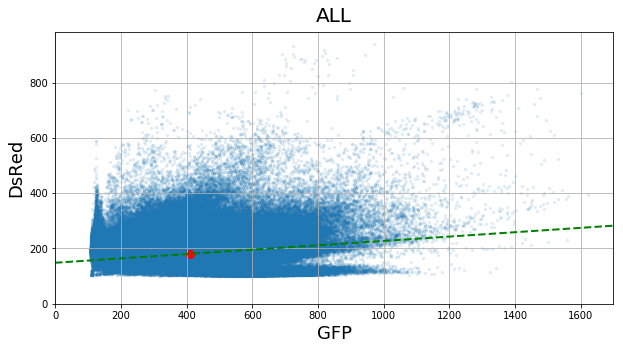

In [32]:
plt=plot_Raw_flourescence(pop_df["GFP"],pop_df["DsRed"],"ALL","GFP","DsRed",0,0)
#plt.yscale("log")
#plt.xscale("log")
plt.show()
plt.close()

# for trap in list_pos:
#     trap_df=pop_df[pop_df['pos']==trap].copy()
    
#     plt=plot_Raw_flourescence(trap_df["GFP"],trap_df["DsRed"],trap,"GFP","DsRed",0,0)
#     plt.show()
#     plt.close()


In [33]:
trapDF_list=[]
pop_df_presignal=pop_df[(pop_df['frame']<frame_signal_start)&(pop_df['pos']!="xy33")].copy()
meanGFPp=pop_df_presignal['GFP'].mean()
meanDsRedp=pop_df_presignal['DsRed'].mean()

gfp_max=pop_df['GFP'].max()
rfp_max=pop_df['DsRed'].max()

print("Normalizing flourescence by max per trap and calculating its polar coordinates ")
for trap in list_pos:
    trap_df=pop_df[pop_df['pos']==trap].copy()
    #gfp_max=trap_df['GFP'].max()
    #rfp_max=trap_df['DsRed'].max()
    print(trap, end=' ')

    gfpsN=trap_df["GFP"]/gfp_max
    rfpsN=trap_df["DsRed"]/rfp_max
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    phis=[]
    rhos=[]
    relInt=[]
    absInt=[]
    for this_gfp,this_rfp in zip(gfpsN,rfpsN):
        this_phi,this_rho=cart2pol(this_gfp,this_rfp)
        phis.append(this_phi)
        rhos.append(this_rho)
        rgfp=this_gfp*gfp_max
        rrfp=this_rfp*rfp_max
        ri=((rgfp/meanGFPp)-(rrfp/meanDsRedp))
        relInt.append(ri)
        ai=np.sqrt((rgfp**2)+(rrfp**2))
        absInt.append(ai)


    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"relInt":relInt,"absInt":absInt,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phi_N":phis,"rho_N":rhos})
    trapDF_list.append(trapDF)
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.head()

Normalizing flourescence by max per trap and calculating its polar coordinates 
xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
0,xy01,1,0,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n0_x277_y416,407.474,194.154,0.444657,451.365524,-0.090313,451.365524,0.251212,0.206342,0.687645,0.325092
1,xy01,1,1,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n1_x247_y410,407.276,193.945,0.444427,451.096889,-0.089656,451.096889,0.251090,0.206120,0.687355,0.324856
2,xy01,1,2,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n2_x500_y410,125.806,219.177,1.049719,252.716654,-0.879576,252.716654,0.077561,0.232936,1.249372,0.245509
3,xy01,1,3,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n3_x483_y409,128.419,222.000,1.046363,256.467229,-0.888595,256.467229,0.079172,0.235936,1.247039,0.248865
4,xy01,1,4,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n4_x111_y408,331.119,164.286,0.460566,369.634525,-0.108230,369.634525,0.204139,0.174599,0.707560,0.268621


## This section discriminate data by their angle in polar coordinates 
#### Creates a histogram by trap/pos using the bins of the whole population distribution
#### Gives a data frame of data which angles have n element in a bin.


In [34]:

to_check_df_list=[]
n_lim=10  #use 10 for accurate rotation and normalization, 1 for exploring one trap



for angle_type in ["phi","phi_N"]:

    maxPhiT=pop_df_plus[angle_type].max()
    minPhiT=pop_df_plus[angle_type].min()
    phi_range=np.linspace(minPhiT,maxPhiT,100)



    for trap in list_pos:
        trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
#        print(trap, end=" ")

        #### comment this conditional to analize all traps  #####   
    #     if(trap!=to_clean_trap):
    #         continue


        n,bins,patches=plt.hist(trap_df[angle_type],bins=phi_range)
        #plt.show()
        plt.close()

        lows=[]
        tmean=trap_df[angle_type].mean()
        for i,ni in enumerate(n):

            if(ni<=n_lim):
                lows.append(bins[i])
                #print("****",ni,bins[i])


        lefts=[x for x in lows if x<tmean]
        rights=[x for x in lows if x>tmean]
        lt=0
        rt=bins[-1]
        if(len(lefts)>0):
            lt=lefts[-1]
        if(len(rights)>0):
            rt=rights[0]
        #print("Trap %s thresholds: %s\t%s"%(trap,lt,rt))
        to_check_trap_df=trap_df[(trap_df[angle_type]<=lt)|(trap_df[angle_type]>=rt)].copy()
        to_check_df_list.append(to_check_trap_df)
#        print(to_check_trap_df["frame"].tolist())
        #print()

to_check_df=pd.concat(to_check_df_list)

to_check_df.describe()


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
count,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000
mean,61.409620,224.363296,269.142798,293.941893,0.864587,418.606363,-0.945938,418.606363,0.165930,0.312394,1.082741,0.369305
std,33.697634,202.123829,192.380626,130.984425,0.249751,194.351198,0.836495,194.351198,0.118605,0.139207,0.254536,0.148930
min,1.000000,0.000000,108.622000,103.973000,0.085455,150.400650,-3.418038,150.400650,0.066967,0.110500,0.146611,0.129257
25%,33.000000,28.000000,167.796000,192.446000,0.791997,280.448174,-1.413069,280.448174,0.103448,0.204527,1.050850,0.253493
50%,60.000000,191.000000,208.753000,262.590000,0.895531,372.317179,-0.912166,372.317179,0.128699,0.279074,1.135887,0.342144
75%,92.000000,364.000000,290.795000,372.178000,1.031187,506.328863,-0.586815,506.328863,0.179278,0.395541,1.236422,0.457806
max,116.000000,754.000000,1556.273000,904.576000,1.362598,1573.381632,2.474824,1573.381632,0.959460,0.961360,1.448853,1.051466


### Subtract the elements of the population data frame

In [35]:
to_check_df.index
pop_df_plus_purged=pop_df_plus.copy()
pop_df_plus_purged.drop(to_check_df.index,axis=0,inplace=True)


In [36]:
#pop_df_plus_purged[(pop_df_plus_purged['pos']=="xy19")&(pop_df_plus_purged['frame']==53)&(pop_df_plus_purged['id']>230)&(pop_df_plus_purged['id']<=235)]

## Center mean on $\pi$ and resize data to $[0,\pi]$

In [37]:

pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi=pop_df_plus_presignal['phi'].mean()
rot_theta=np.pi/2- meanPhi


maxPhi=pop_df_plus_purged['phi'].max()
minPhi=pop_df_plus_purged['phi'].min()


maxPhi_rot=maxPhi+rot_theta
minPhi_rot=minPhi+rot_theta
meanPhi_rot=meanPhi+rot_theta

meanRho=pop_df_plus_purged['rho'].mean()
maxRho=pop_df_plus_purged['rho'].max()



minPhi_N=pop_df_plus_purged["phi_N"].min()
maxPhi_N=pop_df_plus_purged["phi_N"].max()
#meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=pop_df_plus_presignal["phi_N"].mean()
rot_theta_N=np.pi/2- meanPhi_N
meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

#print("All:    \t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
#print("All:    \t",minPhi_Nrot,maxPhi_Nrot,meanPhi_Nrot,rot_theta_N,minPhi_N,maxPhi_N)



trapDF_list=[]

for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    print(trap,end=" ")
    
    phis_rot=trap_df['phi']+rot_theta
    rhos=trap_df['rho']
    
    phis01=[]
    
    for this_phi in phis_rot:

        if(this_phi<meanPhi_rot):
            phi01=((this_phi-minPhi_rot)/(meanPhi_rot-minPhi_rot))*np.pi/2
                  
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_rot)/(maxPhi_rot-meanPhi_rot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("*",this_phi)
#         if(phi01==0):
#             print("*",this_phi)

        phis01.append(phi01)
    
    rhos01=rhos/maxRho
    maxRho99=rhos.mean()+4*rhos.std()
    rhos01=rhos/maxRho99 
    
    phis_Nrot=trap_df['phi_N']+rot_theta_N
    rhosN01=trap_df['rho_N']
    maxRhoN99=rhosN01.mean()+4*rhosN01.std()
    #rhosN01=rhosN01/np.max(rhosN01)
    rhosN01=rhosN01/maxRhoN99
    phisN01=[]

    for this_phi in phis_Nrot:

        if(this_phi<meanPhi_Nrot):
            phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("**",this_phi)
#         if(phi01==0):
#             print("**",this_phi)

        phisN01.append(phi01)
    
    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"phi_rot":phis_rot,"phi_01":phis01,"rho_01":rhos01,"phi_Nrot":phis_Nrot,"phi_N01":phisN01,"rho_N01":rhosN01})
    trapDF_list.append(trapDF)
print()
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df_plus,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.describe()


xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01
count,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06
mean,5.189755e+01,2.682449e+02,4.111835e+02,1.808926e+02,4.306317e-01,4.520187e+02,-1.074981e-02,4.520187e+02,2.534993e-01,1.922479e-01,6.602467e-01,3.211898e-01,1.577363e+00,1.482561e+00,5.502246e-01,1.577702e+00,1.539750e+00,5.809791e-01
std,3.326904e+01,1.703437e+02,1.071518e+02,3.723390e+01,1.218989e-01,1.016903e+02,2.815496e-01,1.016903e+02,6.606030e-02,3.957121e-02,1.387367e-01,6.315124e-02,1.218989e-01,3.266646e-01,1.186688e-01,1.387367e-01,3.429975e-01,1.114912e-01
min,1.000000e+00,0.000000e+00,1.066880e+02,1.013150e+02,8.545451e-02,1.504007e+02,-3.418038e+00,1.504007e+02,6.577437e-02,1.076749e-01,1.466109e-01,1.292572e-01,1.232186e+00,-3.764611e-02,1.608656e-01,1.064067e+00,-4.283142e-02,2.240169e-01
25%,2.300000e+01,1.260000e+02,3.453930e+02,1.586890e+02,3.713469e-01,3.854966e+02,-9.389393e-02,3.854966e+02,2.129387e-01,1.686505e-01,5.911971e-01,2.787251e-01,1.518078e+00,1.320379e+00,4.702505e-01,1.508653e+00,1.372907e+00,5.053124e-01
50%,4.800000e+01,2.540000e+02,4.026280e+02,1.739270e+02,4.068492e-01,4.405804e+02,8.829045e-03,4.405804e+02,2.482248e-01,1.848451e-01,6.388711e-01,3.126173e-01,1.553581e+00,1.489020e+00,5.424016e-01,1.556327e+00,1.524720e+00,5.718385e-01
75%,8.000000e+01,3.900000e+02,4.685430e+02,1.943990e+02,4.514720e-01,5.055028e+02,1.109157e-01,5.055028e+02,2.888621e-01,2.066022e-01,6.962198e-01,3.530675e-01,1.598203e+00,1.620795e+00,6.198484e-01,1.613676e+00,1.660760e+00,6.444742e-01
max,1.160000e+02,7.660000e+02,1.622030e+03,9.409340e+02,1.362598e+00,1.772195e+03,2.474824e+00,1.772195e+03,1.000000e+00,1.000000e+00,1.448853e+00,1.276873e+00,2.509329e+00,3.282958e+00,2.010647e+00,2.366309e+00,3.239833e+00,2.051824e+00


In [38]:
pop_df_plus_limits=pop_df_plus_purged.copy()
pop_df_plus_limits=pd.merge(pop_df_plus,pop_df_plus_purged)


## Calculate deviation over mean

In [39]:
pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi01=pop_df_plus_presignal['phi_01'].mean()
meanPhi_N01=pop_df_plus_presignal["phi_N01"].mean()

print(meanPhi,meanPhi_N)

phis=pop_df_plus['phi_01']
phis_N=pop_df_plus['phi_N01']
pos=pop_df_plus['pos']
ids=pop_df_plus['id']
framess=pop_df_plus['frame']


dev_mean=[]
dev_mean_N=[]

for this_phi,this_phiN in zip(phis,phis_N):

    this_dev=(this_phi-meanPhi01)/np.pi

    this_devN=(this_phiN-meanPhi_N01)/np.pi
    
    dev_mean.append(this_dev)
    dev_mean_N.append(this_devN)

tempDF=pd.DataFrame({"pos":pos,"frame":framess,"id":ids,"dev_mean":dev_mean,"dev_mean_N":dev_mean_N})
pop_df_plus=pd.merge(pop_df_plus,tempDF,on=['pos','frame','id'])



pop_df_plus.describe()

0.42406481800619344 0.6533405989075047


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01,dev_mean,dev_mean_N
count,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06
mean,5.189755e+01,2.682449e+02,4.111835e+02,1.808926e+02,4.306317e-01,4.520187e+02,-1.074981e-02,4.520187e+02,2.534993e-01,1.922479e-01,6.602467e-01,3.211898e-01,1.577363e+00,1.482561e+00,5.502246e-01,1.577702e+00,1.539750e+00,5.809791e-01,4.289337e-03,4.858656e-03
std,3.326904e+01,1.703437e+02,1.071518e+02,3.723390e+01,1.218989e-01,1.016903e+02,2.815496e-01,1.016903e+02,6.606030e-02,3.957121e-02,1.387367e-01,6.315124e-02,1.218989e-01,3.266646e-01,1.186688e-01,1.387367e-01,3.429975e-01,1.114912e-01,1.039806e-01,1.091795e-01
min,1.000000e+00,0.000000e+00,1.066880e+02,1.013150e+02,8.545451e-02,1.504007e+02,-3.418038e+00,1.504007e+02,6.577437e-02,1.076749e-01,1.466109e-01,1.292572e-01,1.232186e+00,-3.764611e-02,1.608656e-01,1.064067e+00,-4.283142e-02,2.240169e-01,-4.796077e-01,-4.988926e-01
25%,2.300000e+01,1.260000e+02,3.453930e+02,1.586890e+02,3.713469e-01,3.854966e+02,-9.389393e-02,3.854966e+02,2.129387e-01,1.686505e-01,5.911971e-01,2.787251e-01,1.518078e+00,1.320379e+00,4.702505e-01,1.508653e+00,1.372907e+00,5.053124e-01,-4.733480e-02,-4.824911e-02
50%,4.800000e+01,2.540000e+02,4.026280e+02,1.739270e+02,4.068492e-01,4.405804e+02,8.829045e-03,4.405804e+02,2.482248e-01,1.848451e-01,6.388711e-01,3.126173e-01,1.553581e+00,1.489020e+00,5.424016e-01,1.556327e+00,1.524720e+00,5.718385e-01,6.345156e-03,7.448230e-05
75%,8.000000e+01,3.900000e+02,4.685430e+02,1.943990e+02,4.514720e-01,5.055028e+02,1.109157e-01,5.055028e+02,2.888621e-01,2.066022e-01,6.962198e-01,3.530675e-01,1.598203e+00,1.620795e+00,6.198484e-01,1.613676e+00,1.660760e+00,6.444742e-01,4.829052e-02,4.337728e-02
max,1.160000e+02,7.660000e+02,1.622030e+03,9.409340e+02,1.362598e+00,1.772195e+03,2.474824e+00,1.772195e+03,1.000000e+00,1.000000e+00,1.448853e+00,1.276873e+00,2.509329e+00,3.282958e+00,2.010647e+00,2.366309e+00,3.239833e+00,2.051824e+00,5.773733e-01,5.460119e-01


## Save RelF Data

In [21]:
# export_list=[relIntensityPath,normDataPath,normDataNPath]
# relInt_list=["relInt","phi_01","phi_N01"]
# absInt_list=["absInt","rho_01","rho_N01"]

export_list=[normDataPath]
relInt_list=["phi_N01"]
absInt_list=["rho_N01"]



for pos in list_pos:
    df_pos=pop_df_plus[pop_df_plus['pos']==pos]
    for frame in frames_list:
        df_pos_frame=df_pos[df_pos["frame"]==frame]
        
        ids=df_pos_frame['id']
        imgsGFP=df_pos_frame['imgGFP']
        imgsDsRed=df_pos_frame['imgDsRed']
        this_pos=df_pos_frame['pos']
        this_frame=df_pos_frame['frame']
        this_label=df_pos_frame['label']
        this_GFP=df_pos_frame['GFP']
        this_DsRed=df_pos_frame['DsRed']
        
        framestr=str(frame).zfill(3)
        fileNamep="%s_%s_%s.txt"%(expeLabel,pos,framestr)
        
        for i in range(len(export_list)):
            exportPath=export_list[i]
            relInt_type=relInt_list[i]
            absInt_type=absInt_list[i]
            
            this_relInt=df_pos_frame[relInt_type]
            this_absInt=df_pos_frame[absInt_type]
            
            rows=zip(ids,imgsGFP,imgsDsRed,this_pos,this_frame,this_label,this_GFP,this_DsRed,this_relInt,this_absInt)
                 
            outPath=os.path.join(exportPath,pos)
            if not os.path.exists(outPath):
                os.mkdir(outPath)
            
            fileName=os.path.join(outPath,fileNamep)
            toFileData(fileName, rows)
            print(fileName)
        #print(x)

../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy01/HT-Sine-2hr_xy01_013.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_013.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_014.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_015.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_016.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_017.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_018.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_019.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_020.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_021.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_022.txt
../../data_sample/HT-Sine-2hr/data/normData/xy02/HT-Sine-2hr_xy02_023.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_026.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_027.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_028.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_029.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_030.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_031.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_032.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_033.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_034.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_035.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_036.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_037.txt
../../data_sample/HT-Sine-2hr/data/normData/xy03/HT-Sine-2hr_xy03_038.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_090.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_091.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_092.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_095.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_096.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_097.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_098.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_099.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_100.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_101.txt
../../data_sample/HT-Sine-2hr/data/normData/xy05/HT-Sine-2hr_xy05_102.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy07/HT-Sine-2hr_xy07_013.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_013.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_014.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_015.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_016.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_017.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_018.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_019.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_020.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_021.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_022.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_023.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_024.txt
../../data_sample/HT-Sine-2hr/data/normData/xy08/HT-Sine-2hr_xy08_025.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_026.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_027.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_028.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_029.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_030.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_031.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_032.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_033.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_034.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_035.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_036.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_037.txt
../../data_sample/HT-Sine-2hr/data/normData/xy09/HT-Sine-2hr_xy09_038.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_081.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_082.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_083.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_084.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_085.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_086.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_087.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_088.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_089.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_090.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_091.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_092.txt
../../data_sample/HT-Sine-2hr/data/normData/xy10/HT-Sine-2hr_xy10_093.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_096.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_097.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_098.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_099.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_100.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_101.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_102.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_103.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_104.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_105.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_106.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_107.txt
../../data_sample/HT-Sine-2hr/data/normData/xy11/HT-Sine-2hr_xy11_108.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy12/HT-Sine-2hr_xy12_112.txt
../../data_sample/HT-Sine-2hr/data/normData/xy12/HT-Sine-2hr_xy12_113.txt
../../data_sample/HT-Sine-2hr/data/normData/xy12/HT-Sine-2hr_xy12_114.txt
../../data_sample/HT-Sine-2hr/data/normData/xy12/HT-Sine-2hr_xy12_115.txt
../../data_sample/HT-Sine-2hr/data/normData/xy12/HT-Sine-2hr_xy12_116.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy13/HT-Sine-2hr_xy13_008.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy14/HT-Sine-2hr_xy14_013.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_022.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_023.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_024.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_025.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_026.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_027.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_028.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_029.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_030.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_031.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_032.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_033.txt
../../data_sample/HT-Sine-2hr/data/normData/xy15/HT-Sine-2hr_xy15_034.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_039.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_040.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_041.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_042.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_043.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_044.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_045.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_046.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_047.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_048.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_049.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_050.txt
../../data_sample/HT-Sine-2hr/data/normData/xy16/HT-Sine-2hr_xy16_051.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_083.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_084.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_085.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_086.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_087.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_088.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_089.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_090.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_091.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_092.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy17/HT-Sine-2hr_xy17_095.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_102.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_103.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_104.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_105.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_106.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_107.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_108.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_109.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_110.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_111.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_112.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_113.txt
../../data_sample/HT-Sine-2hr/data/normData/xy18/HT-Sine-2hr_xy18_114.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy20/HT-Sine-2hr_xy20_013.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_032.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_033.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_034.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_035.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_036.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_037.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_038.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_039.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_040.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_041.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_042.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_043.txt
../../data_sample/HT-Sine-2hr/data/normData/xy21/HT-Sine-2hr_xy21_044.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_064.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_065.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_066.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_067.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_068.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_069.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_070.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_071.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_072.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_073.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_074.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_075.txt
../../data_sample/HT-Sine-2hr/data/normData/xy22/HT-Sine-2hr_xy22_076.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_065.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_066.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_067.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_068.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_069.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_070.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_071.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_072.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_073.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_074.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_075.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_076.txt
../../data_sample/HT-Sine-2hr/data/normData/xy23/HT-Sine-2hr_xy23_077.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_095.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_096.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_097.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_098.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_099.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_100.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_101.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_102.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_103.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_104.txt
../../data_sample/HT-Sine-2hr/data/normData/xy24/HT-Sine-2hr_xy24_105.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy26/HT-Sine-2hr_xy26_013.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_019.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_020.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_021.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_022.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_023.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_024.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_025.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_026.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_027.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_028.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_029.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_030.txt
../../data_sample/HT-Sine-2hr/data/normData/xy27/HT-Sine-2hr_xy27_031.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_084.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_085.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_086.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_087.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_088.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_089.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_090.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_091.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_092.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_095.txt
../../data_sample/HT-Sine-2hr/data/normData/xy28/HT-Sine-2hr_xy28_096.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_092.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_095.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_096.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_097.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_098.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_099.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_100.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_101.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_102.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_103.txt
../../data_sample/HT-Sine-2hr/data/normData/xy29/HT-Sine-2hr_xy29_104.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_093.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_094.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_095.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_096.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_097.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_098.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_099.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_100.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_101.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_102.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_103.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_104.txt
../../data_sample/HT-Sine-2hr/data/normData/xy30/HT-Sine-2hr_xy30_105.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_109.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_110.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_111.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_112.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_113.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_114.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_115.txt
../../data_sample/HT-Sine-2hr/data/normData/xy31/HT-Sine-2hr_xy31_116.txt
../../data_sample/HT-Sine-2hr/data/normData/xy32/HT-Sine-2hr_xy32_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy32/HT-Sine-2hr_xy32_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy32/HT-Sine-2hr_xy32_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy32/HT-Sine-2hr_xy32_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy32/HT-Sine-2hr_xy32_005.txt
../../data_sample/HT-Sine-2hr/data/nor

../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_001.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_002.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_003.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_004.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_005.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_006.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_007.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_008.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_009.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_010.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_011.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_012.txt
../../data_sample/HT-Sine-2hr/data/normData/xy33/HT-Sine-2hr_xy33_013.txt
../../data_sample/HT-Sine-2hr/data/nor

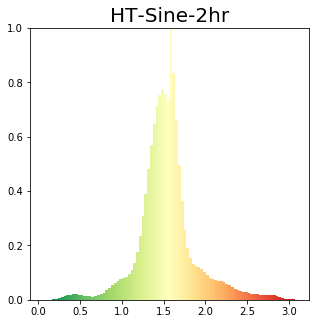

In [40]:
import matplotlib.patches as patches
def plot_distribution_color(ax,this_df,lrange,prop):
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phi_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    

    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    #print(len(h),len(n))
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
            )
        )
    
    return ax




meanPhiN01=pop_df_plus_limits.phi_N01.mean()
maxPhiN01=pop_df_plus_limits.phi_N01.max()
minPhiN01=pop_df_plus_limits.phi_N01.min()


lrange=np.linspace(0-.1,np.pi+.1,101)




#plt=plot_phi_hist(pop_df_plus['phi_N01'],phi_range,expeLabel)
fig,ax=plt.subplots(figsize=(5,5))
prop='phi_N01'
ax=plot_distribution_color(ax,pop_df_plus,lrange,prop)
plt.title("%s"%(expeLabel))

plt.show()
plt.close()

## Signal plot

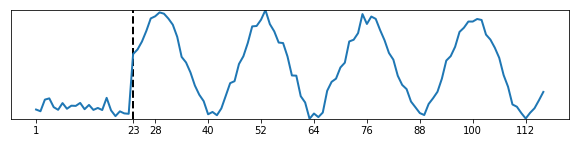

In [114]:
signal_df=pop_df_plus[pop_df_plus["pos"]=="xy33"]

tsignal=signal_df["frame"]
framesSignal=[frame_experiment_start,frame_signal_start]
for i in range(frame_signal_start,frame_experiment_end+1):
        
        x=(i-frame_experiment_start+3)
        x1=x%(30/frame2min)
        x2=x%(60/frame2min)
        if((x1==0) & (x2!=0) ):
            framesSignal.append(i)
        



valsignal=signal_df["phi_N01"]
maxsignal=valsignal.max()
minsignal=valsignal.min()

valsignaln=[(x-minsignal)/(maxsignal-minsignal)-.5 for x in valsignal]

fig,ax=plt.subplots(figsize=(10,2))

ax.plot(tsignal,valsignaln)
ax.vlines(x=frame_signal_start,ymax=.5,ymin=-.5,linestyles="dashed")


plt.xticks(framesSignal)
plt.ylim([-.5,.5])
plt.yticks([])
plt.show()

In [44]:
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end,frame_experiment_end]
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end]
frames2

[1, 23, 69, 116]

[0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793, 3.2986722862692828]


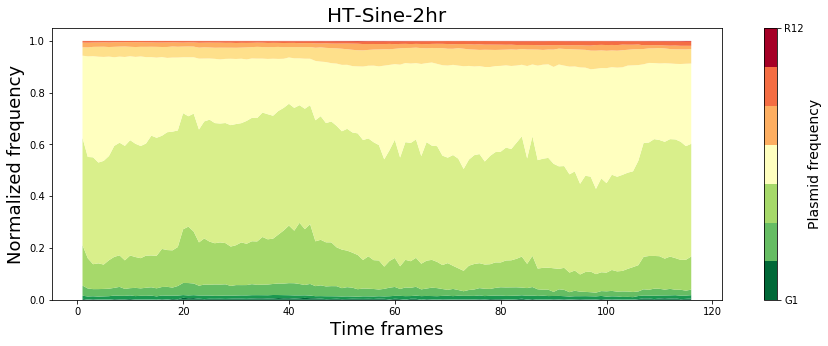

In [42]:
Ncolors=11
cmap = cm.get_cmap("RdYlGn", Ncolors)
cmap_r= cm.get_cmap("RdYlGn_r", Ncolors)


normed=True
bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.05]
binsf=[x*np.pi for x in bins]
print(binsf)

times=frames_list
time_freqs=[]
dcolor=[1-x for x in bins]

colorsl=cmap(dcolor)
for ti,t, in enumerate(times):

    this_df=pop_df_plus[pop_df_plus['frame']==t]
    this_data=this_df['phi_01']
    n,bins,patches=plt.hist(this_data,bins=binsf)#,density='true')
    plt.close()
    tots=sum(n)
    this_freqs=[x for x in n]
    if(normed):
        this_freqs=[x/tots for x in n]
    time_freqs.append(this_freqs)

#time_freqs
#print(time_freqs)
freqs_time=np.zeros((len(time_freqs[0]),len(time_freqs)))

for ti,tfs in enumerate(time_freqs):
    for fi,ft in enumerate(tfs):
        freqs_time[fi][ti]=ft
#print(freqs_time)


#fig= plt.figure( figsize=(10, 5))    
fig,ax=plt.subplots(figsize=(15, 5))
#sc=ax.scatter(binsf,binsf,color=colorsl)
cs = ax.contourf([binsf, bins],cmap=cmap_r)
ax.clear()
ax.stackplot(times,freqs_time,colors=colorsl)
plt.xlabel("Time frames")
plt.ylabel("Normalized frequency")
#plt.colorbar()



cb = plt.colorbar(cs, cmap=cmap)
bcticks=np.linspace(cs.get_array().min(), cs.get_array().max(), 2)
cb.set_ticks(bcticks)
#cb.set_ticklabels(np.linspace(0, round(np.pi,2), 2))
cb.set_ticklabels(["G1","R12"])
cb.set_label('Plasmid frequency',fontsize=14)
#plt.colorbar(sc,ax=ax,ticks=binsf,label="x")
#plt.clim(0, np.pi)
plt.title(expeLabel)

plt.show()

DescribeResult(nobs=20443, minmax=(0.0, 2.997110176551702), mean=1.5109960059953689, variance=0.11070992662295873, skewness=0.2731689455058228, kurtosis=3.1028697206694735)
DescribeResult(nobs=18699, minmax=(0.1425287674628984, 3.0007032797499322), mean=1.5066528533265346, variance=0.11577188016308193, skewness=0.41143991639273336, kurtosis=2.9733877370881494)
DescribeResult(nobs=13061, minmax=(0.1657071181639175, 3.1096532630555447), mean=1.5749450264408793, variance=0.11410877785190007, skewness=0.37604127542680166, kurtosis=3.1332687375244648)
DescribeResult(nobs=11897, minmax=(0.10891542905350043, 3.23983279398686), mean=1.5543796110358419, variance=0.1283669672493936, skewness=0.5470155893619995, kurtosis=3.5057409142107216)


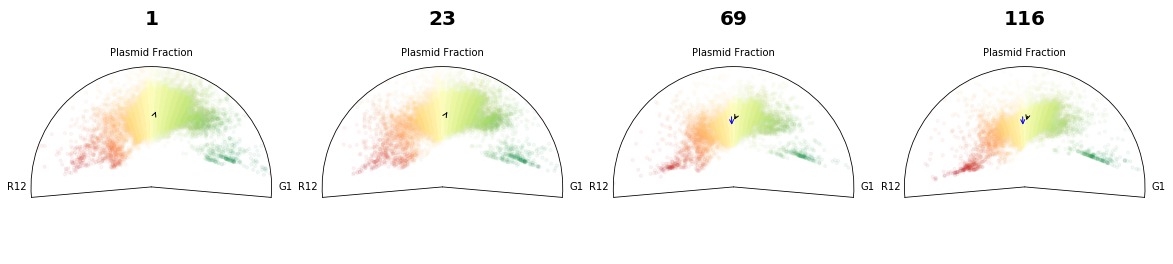

In [46]:

# outDir="%s2Dhist/"%figurePath
# if not os.path.exists(outDir):
#     os.mkdir(outDir)

def plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type):
    
    if(angle_type=="phi_N01"):
        rho_type="rho_N01"
    elif(angle_type=="phi_01"):
        rho_type="rho_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    this_moments=st.describe(phis01)
    print(this_moments)
    
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax
    
fig= plt.figure( figsize=(5*len(frames2), 5))    

ref_df=pd.DataFrame()
ref_df=pop_df_plus[pop_df_plus['frame']<frame_signal_start]
alph=.05
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phi_N01"


for ti,t, in enumerate(frames2):
    name="%s"%t
    axist="1%s%s"%(len(frames2),ti+1)
    ax=fig.add_subplot(axist,projection='polar') 
    #filter_t=filterFrames(data_frame, [t])
    this_df=pop_df_plus[pop_df_plus['frame']==t]
    
    plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type)

plt.show()
#print("Saved as %s%s_2Dhist_<pos>_<t>.tif"%(outDir, expeLabel))

In [45]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')